<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/CargaMassa_2024_1_GrupoX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

In [53]:
R = 0.15 #m
A = 0.15 #m
N= 130
mu_0=0.00000126 #H/m
#k=(125*R*A)/(32*N*N*mu_0*mu_0)
k=3.28e+6
k

3280000.0

In [54]:
I_1 = 0.81 #A
I_2 = 1.18 #A
I_3 = 1.35 #A
r_1 = 0.0545 #m
r_2 = 0.0565 #m
r_3 = 0.0545 #m
V_1 = 194 #V
V_2 = 260 #V
V_3 = 283 #V

In [55]:
X=[0,((np.power(I_1,2))*(np.power(r_1,2))),((np.power(I_2,2))*(np.power(r_2,2))),((np.power(I_3,2))*(np.power(r_3,2)))]
Y=[0,(k*V_1),(k*V_2),(k*V_3)]

In [56]:
print(X)
N_medidas = len(X)
print ( "Número de medidas: {}".format( N_medidas ) )



[0, 0.0019487810250000002, 0.0044448889, 0.005413280625]
Número de medidas: 4


In [57]:
x = np.array(X)
print ("I^2r^2 = ", x)

I^2r^2 =  [0.         0.00194878 0.00444489 0.00541328]


In [58]:
y= np.array(Y)
print ("kV = ", y)

kV =  [0.0000e+00 6.3632e+08 8.5280e+08 9.2824e+08]


In [59]:
media_X = x.mean()
media_X2 = ( x** 2 ).mean()
var_X_populacional = ( x ** 2 ).mean() - ( media_X ** 2 )
dp_X_populacional = np.sqrt( var_X_populacional )
print ( "Média (A^2m^2): {}".format( media_X ) )
print ( "Média quadrados(²): {}".format( media_X2 ) )
print ( "Variância (²): {}".format( var_X_populacional ) )
print ( "Desvio padrão (A^2m^2): {}".format( dp_X_populacional ) )



Média (A^2m^2): 0.0029517376375
Média quadrados(²): 1.3214597985435914e-05
Variância (²): 4.501842904801832e-06
Desvio padrão (A^2m^2): 0.002121754675923169


In [60]:
media_Y = y.mean()
media_Y2 = ( y** 2 ).mean()
var_Y_populacional = ( y ** 2 ).mean() - ( media_Y ** 2 )
dp_Y_populacional = np.sqrt( var_Y_populacional )
print ( "Média : {}".format( media_Y ) )
print ( "Média quadrados: {}".format( media_Y2 ) )
print ( "Variância : {}".format( var_Y_populacional ) )
print ( "Desvio padrão : {}".format( dp_Y_populacional ) )

Média : 604340000.0
Média quadrados: 4.9845012e+17
Variância : 1.332232844e+17
Desvio padrão : 364997649.8554477


In [61]:
x_X_y = ( x * y ).mean()
cov_populacional = x_X_y - ( media_X * media_Y )
coeficiente_correlacao = cov_populacional / ( dp_X_populacional * dp_Y_populacional )
print ( "Covariância (X × Y): {}".format( cov_populacional ) )
print ( "Coeficiente de correlação: {}".format( coeficiente_correlacao ) )


Covariância (X × Y): 730015.1769277498
Coeficiente de correlação: 0.9426417112095181


Coeficientes:


In [62]:
coeficiente_m = cov_populacional / var_X_populacional
print ( "Coeficiente m (C/g): {}".format( coeficiente_m ) )


Coeficiente m (C/g): 162159185108.18948


In [63]:

coeficiente_b = media_Y - coeficiente_m * media_X # cm
print ( "Coeficiente b (): {}".format( coeficiente_b ) )

Coeficiente b (): 125688630.04982758


Incertezas:

In [64]:
arr_desvios_ajuste = ( y - ( coeficiente_m * x + coeficiente_b ) )
arr_desvios_ajuste

array([-1.25688630e+08,  1.94618627e+08,  6.33180803e+06, -7.52618050e+07])

In [65]:
print ( arr_desvios_ajuste ** 2 )
print ( "Soma quadrado desvios (): {}".format( ( arr_desvios_ajuste ** 2 ).sum() ) )



[1.57976317e+16 3.78764100e+16 4.00917929e+13 5.66433929e+15]
Soma quadrado desvios (): 5.937847277114093e+16


In [66]:
ep_y_1 = np.sqrt( ( arr_desvios_ajuste ** 2 ).sum() / ( N_medidas - 2 ) )
print ( "epsilon_y = {}".format( ep_y_1 ) )



epsilon_y = 172305648.15342087


In [67]:
ep_y_2 = dp_Y_populacional * np.sqrt( ( N_medidas / ( N_medidas - 2 ) ) * ( 1. - coeficiente_correlacao ** 2 ) )
print ( "epsilon_y = {}".format( ep_y_2 ) )

epsilon_y = 172305648.1534215


In [68]:
ep_y = ep_y_2
sigma_m = ep_y / ( dp_X_populacional * np.sqrt( N_medidas ) )
print ( "Incerteza padrão coeficiente m (C/g): {}".format( sigma_m ) )


Incerteza padrão coeficiente m (C/g): 40604517126.47972


In [69]:
sigma_b = sigma_m * np.sqrt( media_X2 )
print ( "Incerteza padrão coeficiente b (): {}".format( sigma_b ) )

Incerteza padrão coeficiente b (): 147605087.9751792


Estimativas para os coeficientes:

In [79]:
print ( "m = {:.2f} ± {:.2f} (C/g)".format( np.round( coeficiente_m*0.001, 2 ), np.round( sigma_m*0.001, 2 ) ) )

m = 162159185.11 ± 40604517.13 (C/g)


In [71]:
print ( "b = {} ± {} ()".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ) )

b = 125688630.05 ± 147605087.98 ()


Text(0.4, 0.85, '$b = 125688630.05 \\pm 147605087.98\\,\\left(\\rm{}\\right)$')

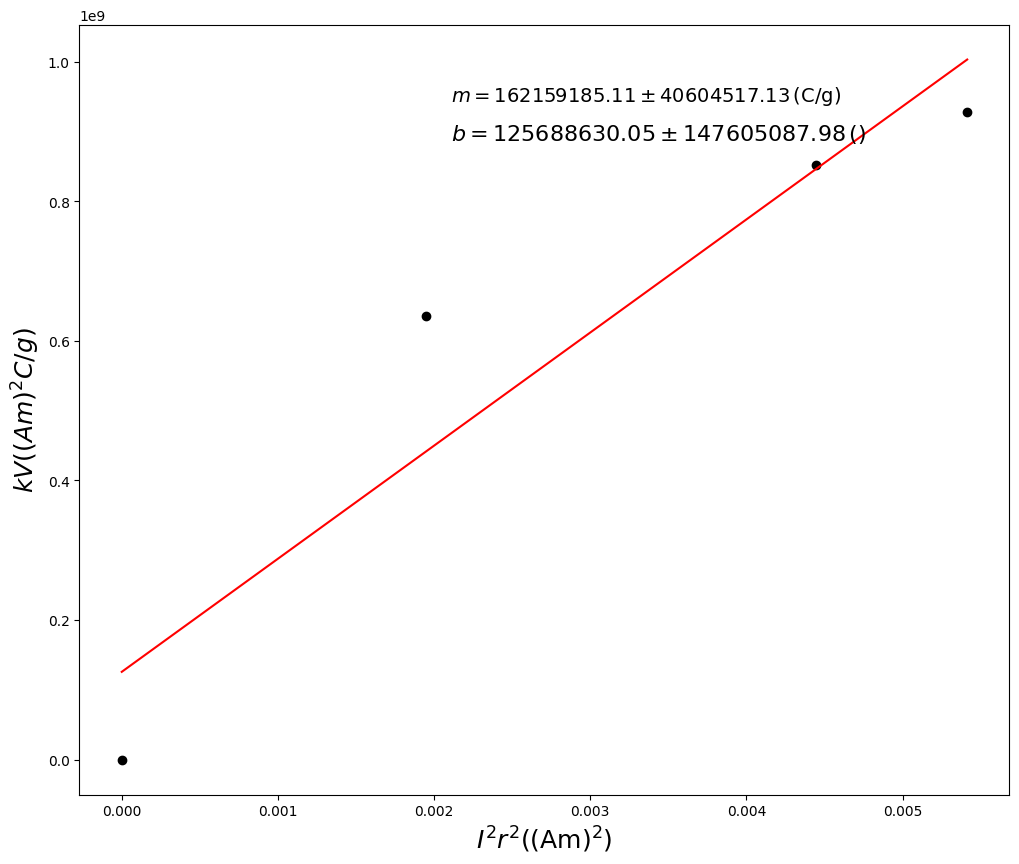

In [80]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( coeficiente_m * x + coeficiente_b ), '-r' )
plt.xlabel( r"$I^{2}r^{2} (\rm{(Am)^{2}})$", fontsize=18)
plt.ylabel( r"$kV((Am)^{2}C/g)$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}\,\left(\rm{{C/g}}\right)$".format( np.round( coeficiente_m*0.001, 2 ), np.round( sigma_m*0.001, 2 ) ),
          fontsize=14, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{}}\right)$".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )

Usando um pacote:

In [73]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x

popt_lin, pcov_lin = curve_fit( pol1, x, y/1e9, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[1.25688630e-01 1.62159185e+02] [[ 2.17872618e-02 -4.86660898e+00]
 [-4.86660898e+00  1.64872683e+03]]


In [74]:
print ( "Coeficiente m (cm): {}".format( popt_lin[ 1 ]*1e9 ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( np.sqrt( pcov_lin[ 1, 1 ]*1e9 ) ) )
print ( "a = {:.2f} ± {:.2f} (cm)".format( np.round( popt_lin[ 1 ]*1e9, 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ]*1e9 ), 2 ) ) )

Coeficiente m (cm): 162159185114.47183
Incerteza padrão coeficiente m (cm): 1284027.5811539805
a = 162159185114.47 ± 1284027.58 (cm)


In [75]:
print ( "Coeficiente b (cm): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (cm): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (cm)".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ) )

Coeficiente b (cm): 0.12568863003128267
Incerteza padrão coeficiente b (cm): 0.14760508718529153
0.13 ± 0.15 (cm)


Text(0.4, 0.85, '$b = 0.13 \\pm 0.15\\,\\left(\\rm{cm}\\right)$')

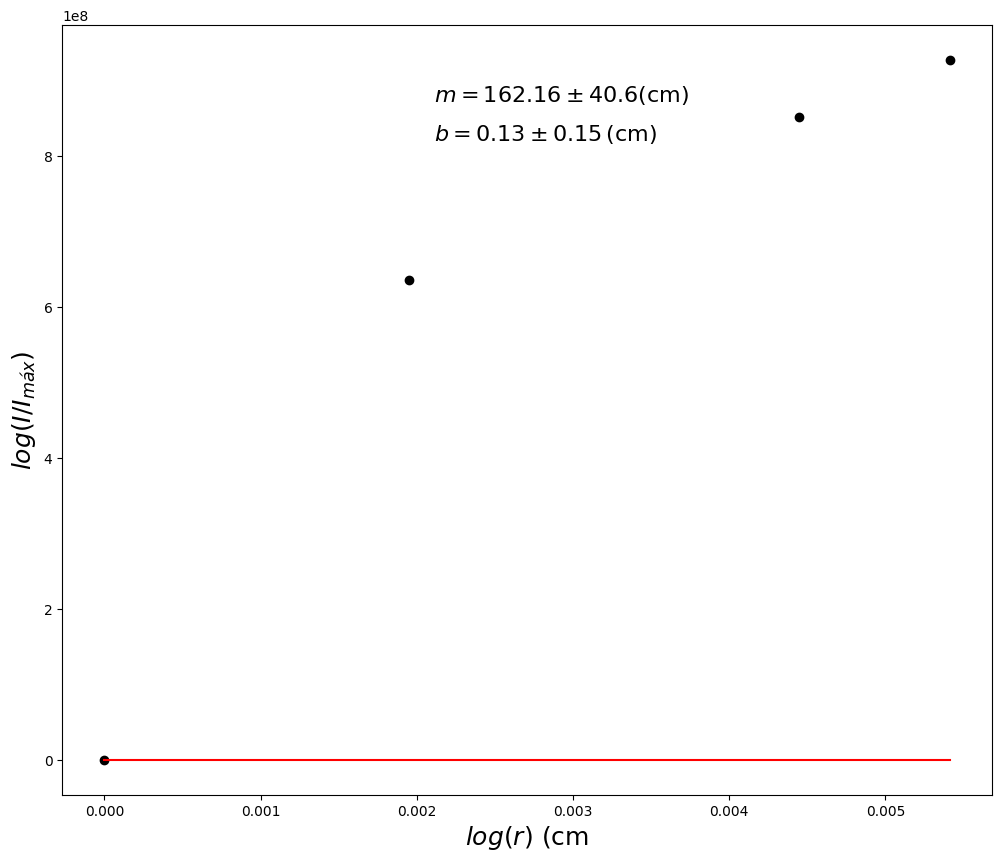

In [76]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * x ), '-r' )
plt.xlabel( r"$log(r)~(\rm{{cm}}$", fontsize=18)
plt.ylabel( r"$log(I/I_{máx})$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}(\rm{{cm}})$".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )